# Network Security Practical Assignment 2
## Name- Yash Jain
## Roll no-19095109
## Branch- Electronics Engineering


In [2]:
import numpy as np
import time
import random
from matplotlib import pyplot as plt

In [3]:
IP = [58, 50, 42, 34, 26, 18, 10, 2,
      60, 52, 44, 36, 28, 20, 12, 4,
      62, 54, 46, 38, 30, 22, 14, 6,
      64, 56, 48, 40, 32, 24, 16, 8,
      57, 49, 41, 33, 25, 17, 9, 1,
      59, 51, 43, 35, 27, 19, 11, 3,
      61, 53, 45, 37, 29, 21, 13, 5,
      63, 55, 47, 39, 31, 23, 15, 7]

FP = [40, 8, 48, 16, 56, 24, 64, 32,
        39, 7, 47, 15, 55, 23, 63, 31,
        38, 6, 46, 14, 54, 22, 62, 30,
        37, 5, 45, 13, 53, 21, 61, 29,
        36, 4, 44, 12, 52, 20, 60, 28,
        35, 3, 43, 11, 51, 19, 59, 27,
        34, 2, 42, 10, 50, 18, 58, 26,
        33, 1, 41, 9, 49, 17, 57, 25]

EBox = [32,1,2,3,4,5,
        4,5,6,7,8,9,
        8,9,10,11,12,13,
        12,13,14,15,16,17,
        16,17,18,19,20,21,
        20,21,22,23,24,25,
        24,25,26,27,28,29,
        28,29,30,31,32,1]

SBox =[
		# S1
		[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7,
		 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8,
		 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0,
		 15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],

		# S2
		[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10,
		 3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5,
		 0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15,
		 13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],

		# S3
		[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8,
		 13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1,
		 13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7,
		 1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],

		# S4
		[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15,
		 13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9,
		 10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4,
		 3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],

		# S5
		[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9,
		 14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6,
		 4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14,
		 11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],

		# S6
		[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11,
		 10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8,
		 9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6,
		 4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],

		# S7
		[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1,
		 13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6,
		 1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2,
		 6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],

		# S8
		[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7,
		 1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2,
		 7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8,
		 2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
	]

F_PBox = [16, 7, 20, 21, 29, 12, 28, 17,
          1, 15, 23, 26, 5, 18, 31, 10,
          2, 8, 24, 14, 32, 27, 3, 9,
          19, 13, 30, 6, 22, 11, 4, 25 ]

key_PBox = [14,    17,   11,    24,     1,    5,
              3,    28,   15,     6,    21,   10,
             23,    19,   12,     4,    26,    8,
             16,     7,   27,    20,    13,    2,
             41,    52,   31,    37,    47,   55,
             30,    40,   51,    45,    33,   48,
             44,    49,   39,    56,    34,  53,
             46,    42,   50,    36,    29,   32]


def xor(left,xorstream):
    xorresult = np.logical_xor(left,xorstream)
    xorresult  = xorresult.astype(int)
    return xorresult

def E_box(right):
    expanded = np.empty(48)
    j = 0
    for i in EBox:
        expanded[j] = right[i - 1]
        j += 1
    expanded = list(map(int,expanded))
    expanded = np.array(expanded)
    return expanded

#clean this code please (sboxlookup)
def sboxloopup(sinput,x):
    tableno = x - 1
    row = int((np.array2string(sinput[0]) + np.array2string(sinput[5])),2)

    # make this part of the code better
    column = sinput[1:5]
    column = np.array2string(column)
    column = column[1:8].replace(" ", "")
    column = int(column,2)
    # print(column,"column")

    elementno = (16 * row) + column
    soutput = SBox[tableno][elementno]
    soutput = list(np.binary_repr(soutput, width=4))
    #converting to list twice seems redundant but seems to be the only simple way as map always returns map object
    soutput= np.array(list(map(int, soutput)))
    return soutput

def sbox(sboxin):
#takes 48 bit input and return 32 bit
    sboxin1 = sboxin[0:6]
    sboxout1 = sboxloopup(sboxin1,1)
    sboxin2 = sboxin[6:12]
    sboxout2 = sboxloopup(sboxin2,2)
    sboxin3 = sboxin[12:18]
    sboxout3 = sboxloopup(sboxin3, 3)
    sboxin4 = sboxin[18:24]
    sboxout4 = sboxloopup(sboxin4, 4)
    sboxin5 = sboxin[24:30]
    sboxout5 = sboxloopup(sboxin5, 5)
    sboxin6 = sboxin[30:36]
    sboxout6 = sboxloopup(sboxin6, 6)
    sboxin7 = sboxin[36:42]
    sboxout7 = sboxloopup(sboxin7, 7)
    sboxin8 = sboxin[42:48]
    sboxout8 = sboxloopup(sboxin8, 8)
    sboxout = np.concatenate([sboxout1,sboxout2,sboxout3,sboxout4,sboxout5,sboxout6,sboxout7,sboxout8])
    return sboxout

def f_permute(topermute):
    permuted= np.empty(32)
    j = 0
    for i in F_PBox:
        permuted[j] = topermute[i - 1]
        j += 1
    return permuted

def f_function(right,rkey):
    expanded = E_box(right)
    xored = xor(expanded,rkey)
    sboxed = sbox(xored)
    xorstream = f_permute(sboxed)
    return xorstream

def round(data,rkey):
    l0 = data[0:32]
    r0 = data[32:64]
    xorstream = f_function(r0,rkey)
    r1 = xor(l0,xorstream)
    l1 = r0
    returndata = np.empty_like(data)
    returndata[0:32] = l1
    returndata[32:64] = r1
    return(returndata)

def permutation(data,x):
    #intial and final permutation conditional based on other passed value
    permute1 = np.empty_like(IP)
    if x == 0:
        j = 0
        for i in IP:
            permute1[j] = data[i-1]
            j += 1
        return(permute1)
    else:
        permute2 = np.empty_like(FP)
        k = 0
        for l in FP:
            permute2[k] = data[l-1]
            k += 1
        return(permute2)


def keyshift(toshift,n):
    if (n == 1) or (n == 2) or (n == 9) or (n == 16):
        toshift= np.roll(toshift,-1)
        return toshift
    else:
        toshift = np.roll(toshift, -2)
        return toshift

def keypermute(key16):
    keypermuted = np.empty([16,48])
    l = 0
    for k in key16:
        j = 0
        for i in key_PBox:
            keypermuted[l][j] = k[i - 1]
            j += 1
        l += 1
    return keypermuted

def keyschedule(key):
    left = key[0:28]
    right = key[28:56]
    shifted = np.zeros(56)
    key16 = np.zeros([16,56])
    for i in range(1,17):
        shifted[0:28] = keyshift(left,i)
        shifted[28:56] = keyshift(right,i)
        left = shifted[0:28]
        right = shifted[28:56]
    #add shifted to key16 and return key16
        key16[i - 1] = shifted
    #key16 is the final shifted 16 key pair now to permute
    key16 = keypermute(key16)
    key16 = [list(map(int, x)) for x in key16]
    key16 = np.array(key16)
    return key16

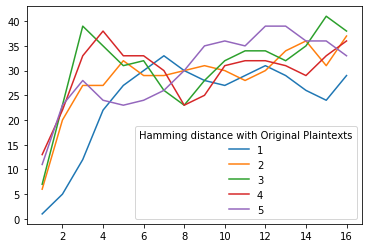

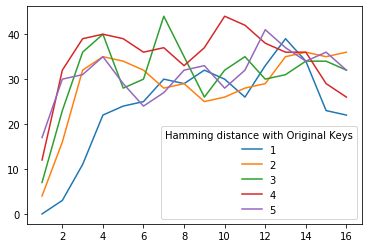

In [10]:
def hamming_distance(arr1: np.ndarray, arr2: np.ndarray) -> int:
    """
    returns hamming distance between two given arrays
    """
    return np.count_nonzero(arr1 != arr2)


def encrypt(key: list, data: list):
    """
    this function will take key and data as list of binary bits
    and return an array of 16 values of each round
    """
    _original_data = data  # to compute HD with original data
    round_val = []  # data to return

    # generate subkeys
    key16 = keyschedule(key)

    # initial permutation of data
    data = permutation(data, 0)

    # round function
    for i in range(16):
        data = round(data, key16[i])
        round_val.append(data)

    # making left side right and right side left
    data = np.roll(data, 32)

    # final encrypted output
    data = permutation(data, 1)

    return round_val


def get_bit_array(x: int):
    """
    returns a sequence of random bits of length x
    """
    return np.array(random.choices((0, 1), k=x))


def flip_n_bits(arr: np.ndarray, n: int):
    """
    flip n random bits in given bit string
    to create a hamming distance of n
    """

    for x in random.sample(range(len(arr)), n):
        arr[x] = 1 - arr[x]

    return arr


def test_with_plaintexts():
    """
    choose a random plaintext and a key
    take 5 plaintexts with different hamming distances from original
    encrypt all with DES with same key
    plot the array of hamming distances at each round
    """

    key = get_bit_array(56)
    pt = get_bit_array(64)

    original_rounds = encrypt(key, pt)

    # iterate over 1 to 5 hamming distances and compare with original round values
    for ham in range(1, 6):
        # this is new plaintext with specified hamming distance from initial plaintext
        new_pt = flip_n_bits(pt, ham)

        # round values of new plaintext
        new_rounds = encrypt(key, new_pt)

        # array of hamming distances
        ham_dist_arr = []

        # compute hamming distance at each round value
        for a, b in zip(original_rounds, new_rounds):
            ham_dist_arr.append(hamming_distance(a, b))

        # plot hamming distances of all 5 plaint texts on same graph
        plt.plot(list(range(1, 17)), ham_dist_arr, label=f"{ham}")
#         plt.legend(title="Hamming distance with original plain text " + str(ham))
#         plt.show()
    plt.legend(title="Hamming distance with Original Plaintexts")
    plt.show()


def test_with_keys():
    """
    choose a random plaintext and a key
    take 5 keys with different hamming distances from original
    encrypt same plaintext with DES with different keys
    plot the array of hamming distances at each round
    """

    key = get_bit_array(56)
    pt = get_bit_array(64)

    original_rounds = encrypt(key, pt)

    # iterate over 1 to 5 hamming distances and compare with original round values
    for ham in range(1, 6):
        # this is new key with specified hamming distance from initial key
        new_key = flip_n_bits(key, ham)

        # round values with new key
        new_rounds = encrypt(new_key, pt)

        # array of hamming distances
        ham_dist_arr = []

        # compute hamming distance at each round value
        for a, b in zip(original_rounds, new_rounds):
            ham_dist_arr.append(hamming_distance(a, b))

        # plot hamming distances of all 5 plaint texts on same graph
        plt.plot(list(range(1, 17)), ham_dist_arr, label=f"{ham}")

    plt.legend(title="Hamming distance with Original Keys")
    plt.show()


test_with_plaintexts()
test_with_keys()